# Collision Severity in Seattle

## Importing libraries to be used in the analysis

In [4]:
import pandas as pd
import numpy as np

In [5]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


## Importing the data from csv file

In [6]:
df = pd.read_csv('C:/Users/Alienware/Desktop/Python/Data-Collisions.csv')

C:\Users\Alienware\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Preprocessing of Data for the Analysis

In [7]:
df.head()

SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0             2 -122.323148  47.703140         1    1307       1307  3502005   
1             1 -122.347294  47.647172         2   52200      52200  2607959   
2             1 -122.334540  47.607871         3   26700      26700  1482393   
3             1 -122.334803  47.604803         4    1144       1144  3503937   
4             2 -122.306426  47.545739         5   17700      17700  1807429   

    STATUS      ADDRTYPE   INTKEY  ... ROADCOND                LIGHTCOND  \
0  Matched  Intersection  37475.0  ...      Wet                 Daylight   
1  Matched         Block      NaN  ...      Wet  Dark - Street Lights On   
2  Matched         Block      NaN  ...      Dry                 Daylight   
3  Matched         Block      NaN  ...      Dry                 Daylight   
4  Matched  Intersection  34387.0  ...      Wet                 Daylight   

  PEDROWNOTGRNT  SDOTCOLNUM SPEEDING ST_COLCODE  \
0           NaN         NaN      NaN         10   
1           NaN   6354039.0      NaN         11   
2           NaN   4323031.0      NaN         32   
3           NaN         NaN      NaN         23   
4           NaN   4028032.0      NaN         10   

                                          ST_COLDESC  SEGLANEKEY  \
0                                  Entering at angle           0   
1  From same direction - both going straight - bo...           0   
2                             One parked--one moving           0   
3                   From same direction - all others           0   
4                                  Entering at angle           0   

   CROSSWALKKEY  HITPARKEDCAR  
0             0             N  
1             0             N  
2             0             N  
3             0             N  
4             0             N  

[5 rows x 38 columns]

In [5]:
df.describe().transpose()

count          mean           std           min  \
SEVERITYCODE    194673.0  1.298901e+00  4.577776e-01  1.000000e+00   
X               189339.0 -1.223305e+02  2.997605e-02 -1.224191e+02   
Y               189339.0  4.761954e+01  5.615664e-02  4.749557e+01   
OBJECTID        194673.0  1.084794e+05  6.264972e+04  1.000000e+00   
INCKEY          194673.0  1.410915e+05  8.663440e+04  1.001000e+03   
COLDETKEY       194673.0  1.412988e+05  8.698654e+04  1.001000e+03   
INTKEY           65070.0  3.755845e+04  5.174599e+04  2.380700e+04   
SEVERITYCODE.1  194673.0  1.298901e+00  4.577776e-01  1.000000e+00   
PERSONCOUNT     194673.0  2.444427e+00  1.345929e+00  0.000000e+00   
PEDCOUNT        194673.0  3.713920e-02  1.981499e-01  0.000000e+00   
PEDCYLCOUNT     194673.0  2.839120e-02  1.674128e-01  0.000000e+00   
VEHCOUNT        194673.0  1.920780e+00  6.310467e-01  0.000000e+00   
SDOT_COLCODE    194673.0  1.386777e+01  6.868755e+00  0.000000e+00   
SDOTCOLNUM      114936.0  7.972521e+06  2.553533e+06  1.007024e+06   
SEGLANEKEY      194673.0  2.694011e+02  3.315776e+03  0.000000e+00   
CROSSWALKKEY    194673.0  9.782452e+03  7.226926e+04  0.000000e+00   

                         25%           50%           75%           max  
SEVERITYCODE    1.000000e+00  1.000000e+00  2.000000e+00  2.000000e+00  
X              -1.223487e+02 -1.223302e+02 -1.223119e+02 -1.222389e+02  
Y               4.757596e+01  4.761537e+01  4.766366e+01  4.773414e+01  
OBJECTID        5.426700e+04  1.069120e+05  1.622720e+05  2.195470e+05  
INCKEY          7.038300e+04  1.233630e+05  2.033190e+05  3.314540e+05  
COLDETKEY       7.038300e+04  1.233630e+05  2.034590e+05  3.329540e+05  
INTKEY          2.866700e+04  2.997300e+04  3.397300e+04  7.575800e+05  
SEVERITYCODE.1  1.000000e+00  1.000000e+00  2.000000e+00  2.000000e+00  
PERSONCOUNT     2.000000e+00  2.000000e+00  3.000000e+00  8.100000e+01  
PEDCOUNT        0.000000e+00  0.000000e+00  0.000000e+00  6.000000e+00  
PEDCYLCOUNT     0.000000e+00  0.000000e+00  0.000000e+00  2.000000e+00  
VEHCOUNT        2.000000e+00  2.000000e+00  2.000000e+00  1.200000e+01  
SDOT_COLCODE    1.100000e+01  1.300000e+01  1.400000e+01  6.900000e+01  
SDOTCOLNUM      6.040015e+06  8.023022e+06  1.015501e+07  1.307202e+07  
SEGLANEKEY      0.000000e+00  0.000000e+00  0.000000e+00  5.252410e+05  
CROSSWALKKEY    0.000000e+00  0.000000e+00  0.000000e+00  5.239700e+06

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

### Looking for NaN

In [7]:
df.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

### Selecting the attributes to be used for the analysis

In [8]:
df_new = df[['SEVERITYCODE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]

### Dropping all rows with null and Unknown values

In [9]:
df_new.dropna(inplace = True)

<ipython-input-9-8435a3118ee6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.dropna(inplace = True)


In [10]:
df_new.drop(df_new[df_new.WEATHER == 'Unknown'].index, inplace = True)
df_new.drop(df_new[df_new.ROADCOND == 'Unknown'].index, inplace = True)
df_new.drop(df_new[df_new.LIGHTCOND == 'Unknown'].index, inplace = True)

C:\Users\Alienware\anaconda3\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
df_new.isna().count()

SEVERITYCODE    169781
ADDRTYPE        169781
UNDERINFL       169781
WEATHER         169781
ROADCOND        169781
LIGHTCOND       169781
dtype: int64

### Making the data balanced

In [12]:
df_new['SEVERITYCODE'].value_counts()

1    114074
2     55707
Name: SEVERITYCODE, dtype: int64

In [13]:
sev_1 = df_new.loc[df_new['SEVERITYCODE'] == 1].sample(n=55707, random_state = 0)

In [14]:
sev_2 = df_new.loc[df_new['SEVERITYCODE'] == 2]

In [15]:
data = sev_1.append(sev_2)

In [16]:
data['SEVERITYCODE'].value_counts()

2    55707
1    55707
Name: SEVERITYCODE, dtype: int64

In [17]:
data.head()

SEVERITYCODE      ADDRTYPE UNDERINFL   WEATHER ROADCOND  \
67160              1         Block         0  Overcast      Dry   
19980              1  Intersection         0  Overcast      Dry   
34308              1         Block         0  Overcast      Dry   
78310              1  Intersection         0     Clear      Dry   
143029             1         Block         Y     Clear      Dry   

                      LIGHTCOND  
67160                  Daylight  
19980                  Daylight  
34308   Dark - Street Lights On  
78310                  Daylight  
143029                 Daylight

In [18]:
data.loc[(data['UNDERINFL'] == 'N'),'UNDERINFL'] = 0
data.loc[(data['UNDERINFL'] == '0'),'UNDERINFL'] = 0
data.loc[(data['UNDERINFL'] == 'Y'),'UNDERINFL'] = 1
data.loc[(data['UNDERINFL'] == '1'),'UNDERINFL'] = 1

In [19]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data['WEATHER'] = label_encoder.fit_transform(data['WEATHER'])
data['ROADCOND'] = label_encoder.fit_transform(data['ROADCOND'])
data['LIGHTCOND'] = label_encoder.fit_transform(data['LIGHTCOND'])
data = data.astype('int64')

In [20]:
data.head()

SEVERITYCODE  ADDRTYPE  UNDERINFL  WEATHER  ROADCOND  LIGHTCOND
67160              1         1          0        4         0          5
19980              1         2          0        4         0          5
34308              1         1          0        4         0          2
78310              1         2          0        1         0          5
143029             1         1          1        1         0          5

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111414 entries, 67160 to 194671
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   SEVERITYCODE  111414 non-null  int64
 1   ADDRTYPE      111414 non-null  int64
 2   UNDERINFL     111414 non-null  int64
 3   WEATHER       111414 non-null  int64
 4   ROADCOND      111414 non-null  int64
 5   LIGHTCOND     111414 non-null  int64
dtypes: int64(6)
memory usage: 6.0 MB


In [28]:
data['UNDERINFL'].value_counts()

0    105187
1      6227
Name: UNDERINFL, dtype: int64

## Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='UNDERINFL', ylabel='count'>

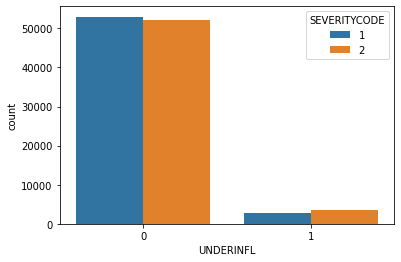

In [29]:
sns.countplot(x = 'UNDERINFL', hue = 'SEVERITYCODE', data = data, order = data['UNDERINFL'].value_counts().index)

<AxesSubplot:xlabel='WEATHER', ylabel='count'>

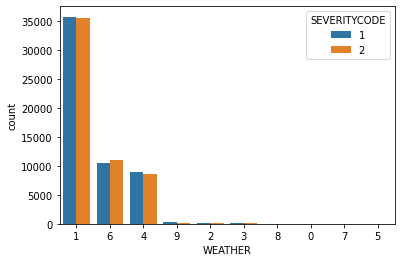

In [31]:
sns.countplot(x = 'WEATHER', hue = 'SEVERITYCODE', data = data, order = data['WEATHER'].value_counts().index)

<AxesSubplot:xlabel='ROADCOND', ylabel='count'>

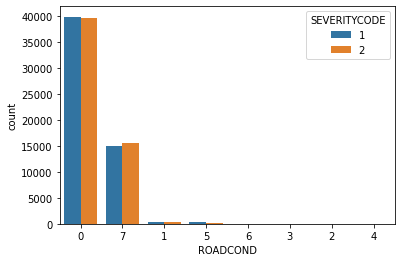

In [32]:
sns.countplot(x = 'ROADCOND', hue = 'SEVERITYCODE', data = data, order = data['ROADCOND'].value_counts().index)

<AxesSubplot:xlabel='LIGHTCOND', ylabel='count'>

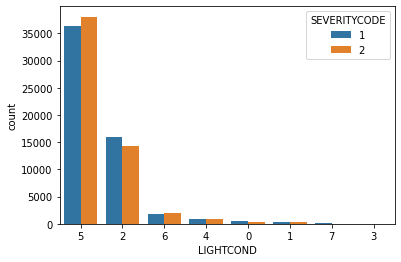

In [33]:
sns.countplot(x = 'LIGHTCOND', hue = 'SEVERITYCODE', data = data, order = data['LIGHTCOND'].value_counts().index)

## Normalizing the Data

In [35]:
X = data.drop('SEVERITYCODE', axis = 1)
y = data[['SEVERITYCODE']]

In [38]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:]

array([[-0.78975912, -0.24330913,  0.72472585, -0.62576091,  0.59680124],
       [ 1.2360783 , -0.24330913,  0.72472585, -0.62576091,  0.59680124],
       [-0.78975912, -0.24330913,  0.72472585, -0.62576091, -1.50065038],
       ...,
       [-0.78975912, -0.24330913, -0.70945898, -0.62576091,  0.59680124],
       [ 1.2360783 , -0.24330913, -0.70945898, -0.62576091,  0.59680124],
       [ 1.2360783 , -0.24330913, -0.70945898, -0.62576091,  1.29595177]])